In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
from sklearn.manifold import TSNE

<h1>Loading the Train data

In [46]:
#This will contain all the name of the features for our dataframe
features = list()

with open('UCI_HAR_Dataset/features.txt') as f:
    features = [line for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [47]:
#Loading the X_train data
X_train = pd.read_csv('UCI_HAR_dataset/train/X_train.txt', delim_whitespace=True, names=features)

Y_train = pd.read_csv('UCI_HAR_dataset/train/Y_train.txt', names=['activity'])

Y_train_labels = Y_train.squeeze().map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

#Returning a final data frame with all required columns
X_train['activity'] = Y_train
X_train['labels'] = Y_train_labels
X_train['subject'] = pd.read_csv('UCI_HAR_dataset/train/subject_train.txt', header=None, squeeze=True)

<h1>Loading the test data

In [53]:
#Loading the X_train data
X_test = pd.read_csv('UCI_HAR_dataset/test/X_test.txt', delim_whitespace=True, names=features)

Y_test = pd.read_csv('UCI_HAR_dataset/test/Y_test.txt', names=['activity'])

Y_test_labels = Y_test.squeeze().map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

#Returning a final data frame with all required columns
X_test['activity'] = Y_test✔
X_test['labels'] = Y_test_labels
X_test['subject'] = pd.read_csv('UCI_HAR_dataset/test/subject_test.txt', header=None, squeeze=True)

<h1>Data cleaning</h1>
<ol>
    <li>Checking duplicate rows</li>
    <li>Checking for NaN/null values</li>
    <li>Check for data imbalance</li>


In [65]:
print("Number of duplicates in X_train :",X_train[X_train.duplicated()].shape[0])
print("Number of duplicates in X_test :",X_test[X_test.duplicated()].shape[0])

Number of duplicates in X_train : 0
Number of duplicates in X_test : 0


In [67]:
print('We have {} NaN/Null values in train'.format(X_train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(X_test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


In [ ]:
#Saving the dataframe to CSV format
X_train.to_csv('UCI_HAR_Dataset/csv_files/X_train.csv', index=False)
X_test.to_csv('UCI_HAR_Dataset/csv_files/X_test.csv', index=False)

<h3>Checking for imbalanced data

In [69]:
#Checking for imbalamced data
X_train.loc[:,'labels'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: labels, dtype: int64

In [13]:
train_data = pd.read_csv('UCI_HAR_Dataset/csv_files/X_train.csv')
test_data = pd.read_csv('UCI_HAR_Dataset/csv_files/X_test.csv')

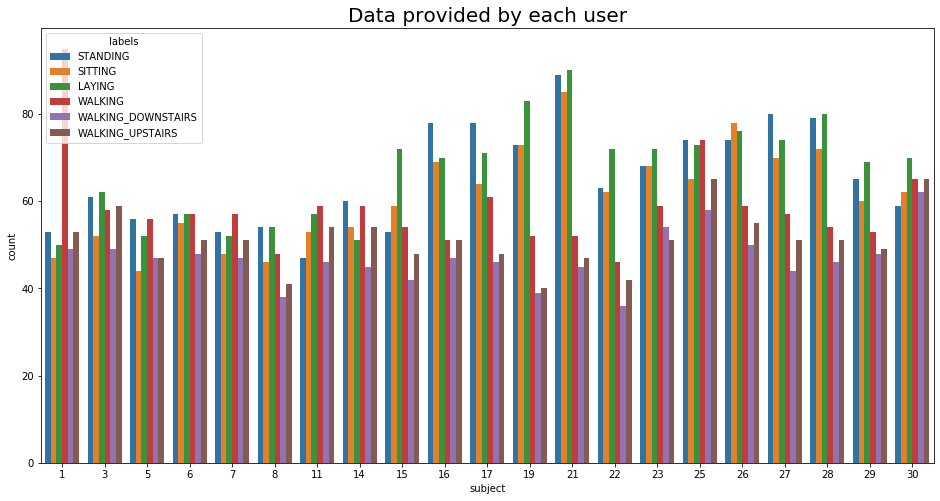

In [16]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='labels', data = train_data)
plt.show()

<b>Conclusion - The data seems fairly balanced

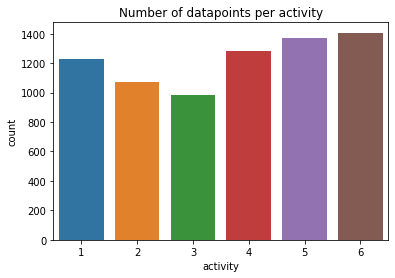

In [23]:
#Checking how many datapoints per activity we have

ax=sns.countplot(x=train_data.activity)
ax.set_title("Number of datapoints per activity")
plt.show()

<h1>Visualizing data in 2D using tsne

In [ ]:
tsne= TSNE(n_components=2,perplexity=30.0).fit_transform(vec)

In [85]:
def execute_tsne(data,perplexity=[20,30,40,50],n_iter=1000):
    
    df = data.drop(['activity','labels','subject'],axis=1)
    
    for i in perplexity:
        
        print("================================================")
        print("Fitting tsne with perplexity {} and {} iterations".format(i,n_iter))
        print("================================================")
        print("Fitting in progress...")
        
        tsne= TSNE(n_components=2,perplexity=i).fit_transform(df)
        tsne1 = [i[0] for i in tsne]
        tsne2 = [i[1] for i in tsne]
        print("***Fitting DONE***")
        data_new = pd.DataFrame({'tsne1':tsne1,'tsne2':tsne2,'label':data['labels']})
        
        plt.figure(figsize=(10,10))
        plt.title("Perplexity "+str(i)+ ", iterations "+str(n_iter))
        ax=sns.scatterplot(data_new["tsne1"],data_new["tsne2"],hue = data_new['label'])
        ax.set_xlabel("First dimension",fontsize=25)
        ax.set_ylabel("Second dimension",fontsize=25)
        
        img_name = "tsne" + '_perp_{}_iter_{}.png'.format(i, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        
        plt.show()

Fitting tsne with perplexity 20 and 1000 iterations
Fitting in progress...
***Fitting DONE***
saving this plot as image in present working directory...


C:\Users\SOURAV\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


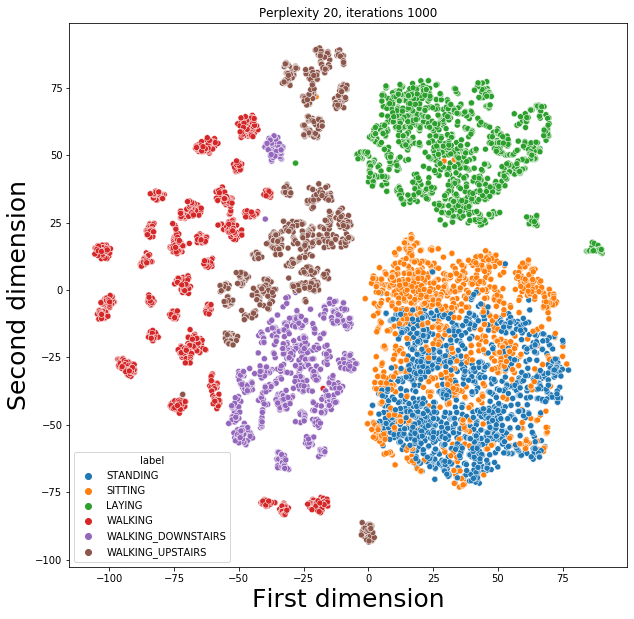

Fitting tsne with perplexity 30 and 1000 iterations
Fitting in progress...
***Fitting DONE***
saving this plot as image in present working directory...


C:\Users\SOURAV\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


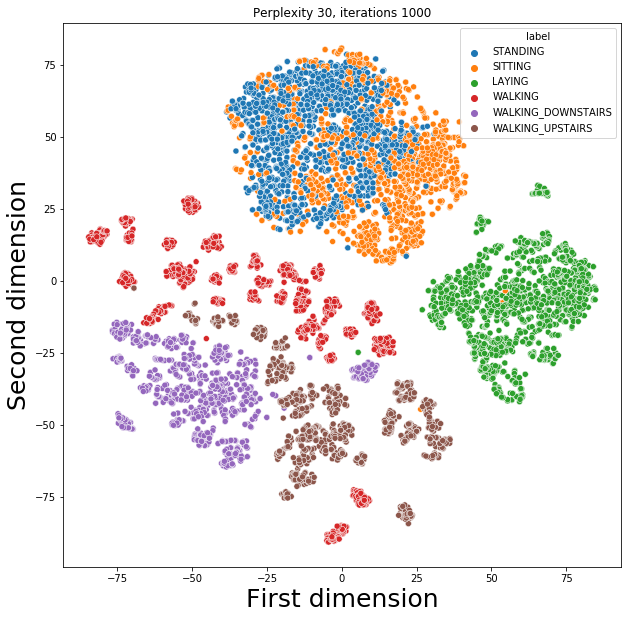

Fitting tsne with perplexity 40 and 1000 iterations
Fitting in progress...
***Fitting DONE***
saving this plot as image in present working directory...


C:\Users\SOURAV\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


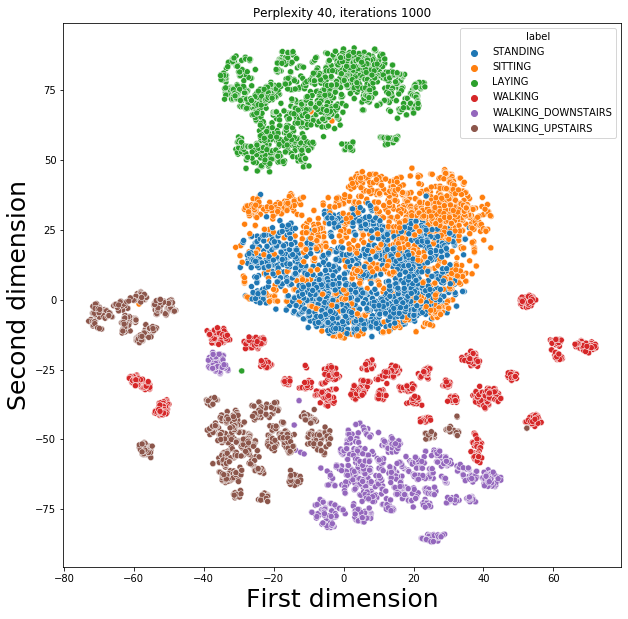

Fitting tsne with perplexity 50 and 1000 iterations
Fitting in progress...
***Fitting DONE***
saving this plot as image in present working directory...


C:\Users\SOURAV\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


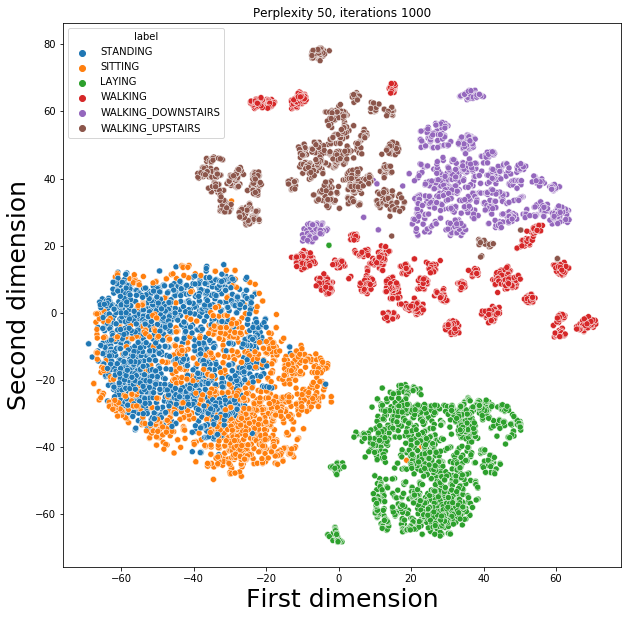

In [84]:
execute_tsne(data=train_data)